# **Tree Model Explainability with SHAP**
---

**The notebook explores the explainability of a decision tree model using SHAP (SHapley Additive exPlanations) values. It delves into local and global interpretations of the model's predictions, identifying feature contributions and importance in predicting breast cancer malignancy.**

**Key Takeaways:**

- [**Shap Tree Explainer**](##Shap-Tree-Explainer): SHAP values are calculated for the decision tree model, providing insights into feature importance and contributions to predictions.

- [**Local Interpretation**](##Local-Interpretation): Specific instances are analyzed to understand how features contribute to the model's predictions.

- [**Global interpretation**](##Global-Interpretation): Feature importance is evaluated across the entire dataset, revealing the top contributing features to malignancy predictions.

- [**Performance Heatmap**](##Performance-Heatmap): A heatmap visualizes the model's performance, highlighting the relationship between feature importance and prediction accuracy.


In [ ]:
#importing libararies
import os
import pickle
import shap
from shap import TreeExplainer,Explanation
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# loading test dataset for model testing
data_dir = r"E:\Machine learning\Machine Learning Project\Breast-Cancer-Prediction-with-Decision-Tree-Classifier\data\processed"

def load_data(filename):
    filepath = os.path.join(data_dir, filename)
    with open(filepath, "rb") as f:
        return pickle.load(f)

x_test, y_test = load_data("n_dim_testing.pkl")

print(f"{x_test.shape = }, {y_test.shape = }")

x_test.shape = (114, 15), y_test.shape = (114,)


In [3]:
# loading the model
model_path = r"E:\Machine learning\Machine Learning Project\Breast-Cancer-Prediction-with-Decision-Tree-Classifier\models\model.pkl"
with open(model_path,'rb') as file:
    tree_model = pickle.load(file)

print(tree_model)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=0.01,
                       min_samples_split=0.01, random_state=42)


In [4]:
# feature names
features = ['radius_mean',
 'perimeter_mean',
 'smoothness_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'concave points_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'concave points_worst',
 'principal_component_1',
 'principal_component_2',
 'principal_component_3']

## **Shap Tree Explainer**

Extracting `shap_vales` from `TreeExplainer` which tells how much each feature is contributing to the prediction of the model.


In [5]:
# tree explainer object
explainer = TreeExplainer(model=tree_model,
                          feature_names=features) 

# shap values for both classes
shap_values_prob = explainer.shap_values(x_test) 

# retrieving shap values for positive class i.e. Malignant
shap_values = shap_values_prob[:,:,1]
print(shap_values)
print(f"{shap_values.shape = }")

[[-0.00466426  0.         -0.194666   ...  0.          0.
   0.        ]
 [ 0.0285258   0.          0.34209662 ...  0.          0.
   0.        ]
 [ 0.0285258   0.          0.34209662 ...  0.          0.
   0.        ]
 ...
 [-0.02594396  0.         -0.19827875 ...  0.          0.
   0.        ]
 [ 0.068361    0.         -0.30041288 ...  0.          0.
   0.        ]
 [ 0.04645536  0.          0.33313184 ...  0.          0.
   0.        ]]
shap_values.shape = (114, 15)


In [6]:
# defining a function to get the explanation object for a given instance / for all instances

def get_explanation(instance=...)->Explanation:
    """Returns the explanation object for the given instance."""
    explanation = shap.Explanation(values=shap_values[instance,:],
                                   base_values=explainer.expected_value[1], # expected value of malignant class 
                                   data=x_test[instance,:],
                                   feature_names=features)
    return explanation

The expected `shap_values` for both classes represents the average predicted probability ties for each class. The expected values provide a baseline to compare the predictions for individual instances against the average predictions for the entire dataset.

In [7]:
expected_vals = explainer.expected_value
print(f"expected value for class benign(0): {expected_vals[0]} i.e. predicted proba. 63%")
print(f"expected value for class malignant(1): {expected_vals[1]} i.e. predicted proba. 37%")

expected value for class benign(0): 0.6285714285714286 i.e. predicted proba. 63%
expected value for class malignant(1): 0.37142857142857144 i.e. predicted proba. 37%


## **Local Interpretation**

In [8]:
y_pred_proba = tree_model.predict_proba(x_test)
y_pred = tree_model.predict(x_test)

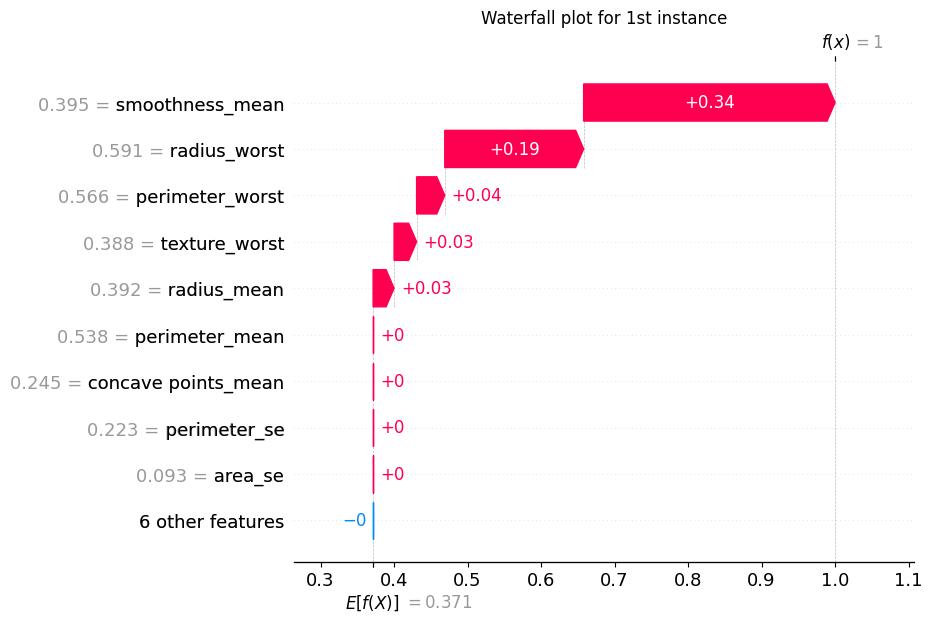

prediction probabilities: [0. 1.]
class predicted: M
actual prediction: M


In [185]:
# waterfall plot of 1st instance

first_explanation = get_explanation(instance=1)
plt.title("Waterfall plot for 1st instance")
shap.plots.waterfall(shap_values=first_explanation,
                      max_display=10,
                      show=False)
plt.show()
print(f"prediction probabilities: {y_pred_proba[1]}")
print(f"class predicted: {y_pred[1]}")
print(f"actual prediction: {y_test.to_numpy()[1]}")


> **The expected value in predicting class as malignant is 37%. Features like `smoothness_mean`, `perimeter_worst`, `radius_worst` etc. increase the positive predicted value upto 100% and predicting the class as positive (malignant)**

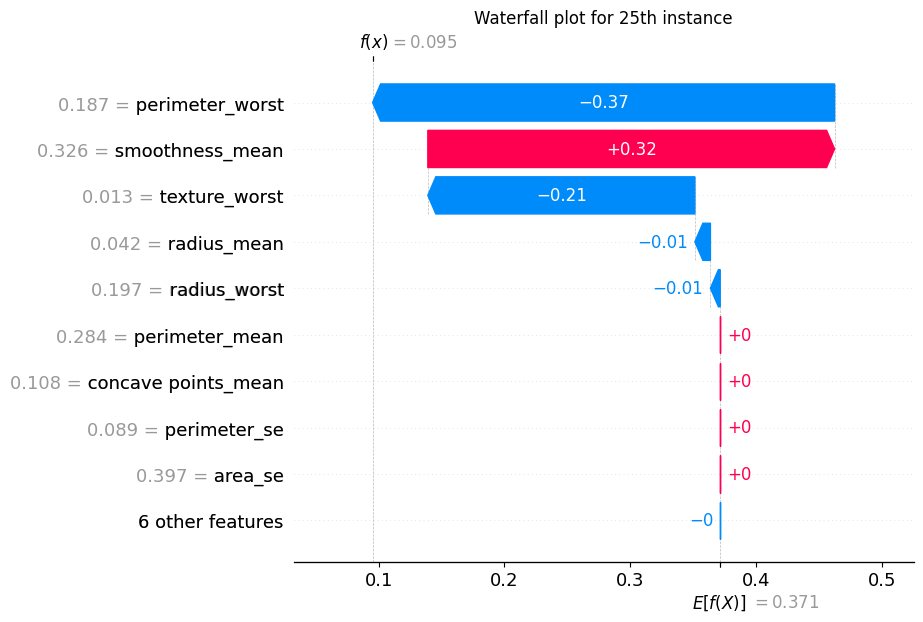

prediction probabilities: [0.9047619 0.0952381]
class predicted: B
actual prediction: B


In [176]:
# waterfall plot of 25th instance

n_explanation = get_explanation(instance=25)
plt.title("Waterfall plot for 25th instance")
shap.plots.waterfall(shap_values=n_explanation,
                      max_display=10,
                      show=False)
plt.show()

print(f"prediction probabilities: {y_pred_proba[25]}")
print(f"class predicted: {y_pred[25]}")
print(f"actual prediction: {y_test.to_numpy()[25]}")


> **A good example to study. The `smoothness_mean` positively contributing in predicting as malignant with +32% to the expected value and making it 69% positive prediction. But other factors like `perimeter_worst` and `texture_worst` contributed negatively and made the final prediction as benign (B).**

We can also see how the model is making the decision for both instances using decision plot.

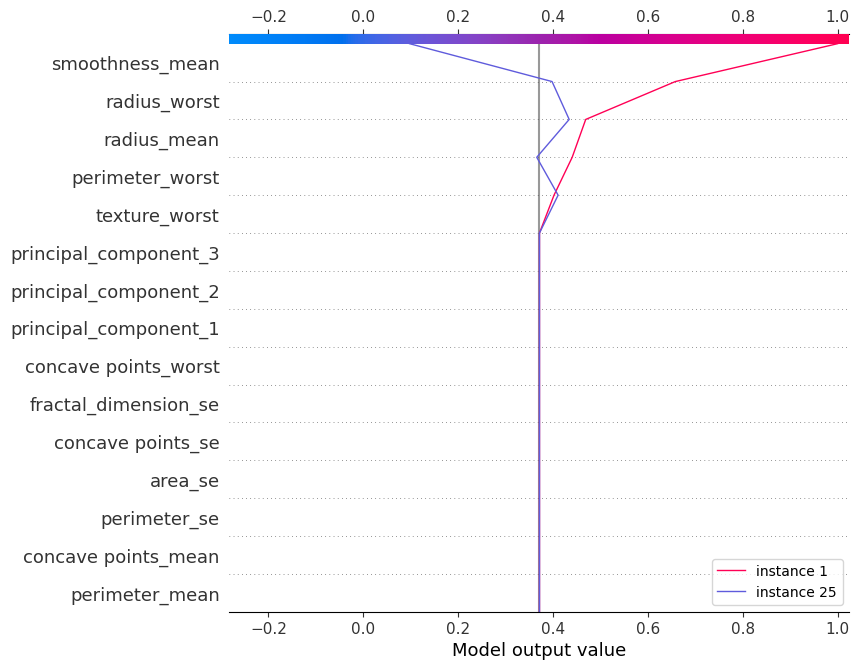

In [183]:
shap.plots.decision(explainer.expected_value[1],
                    shap_values[[1,24]],
                    x_test[[1,24]],
                    feature_names=features,
                    legend_labels =['instance 1', 'instance 25'],
                    legend_location='lower right',
                    show=False)
plt.show()

Further Studying relationship between `smoothness_mean` and `perimeter_worst` with shap_values

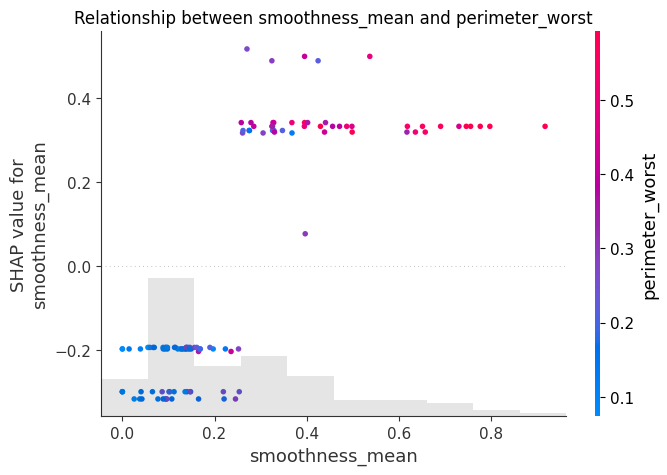

In [153]:
shap.plots.scatter(shap_values=get_explanation()[:,'smoothness_mean'],
                    color=get_explanation()[:,'perimeter_worst'],
                    show=False)

plt.title("Relationship between smoothness_mean and perimeter_worst")
plt.show()


> **The plot suggests that the postive shap_values of `smoothness_mean` more likely to have negative shap_values of `perimeter_worst` and vice versa. The plot doesn't have a clear linear relationship. Therefore, if `smoothness_mean` is low, `perimeter_worst` tends to have a positive contribution towards the model's prediction as malignant class. .**

## **Global Interpretation**

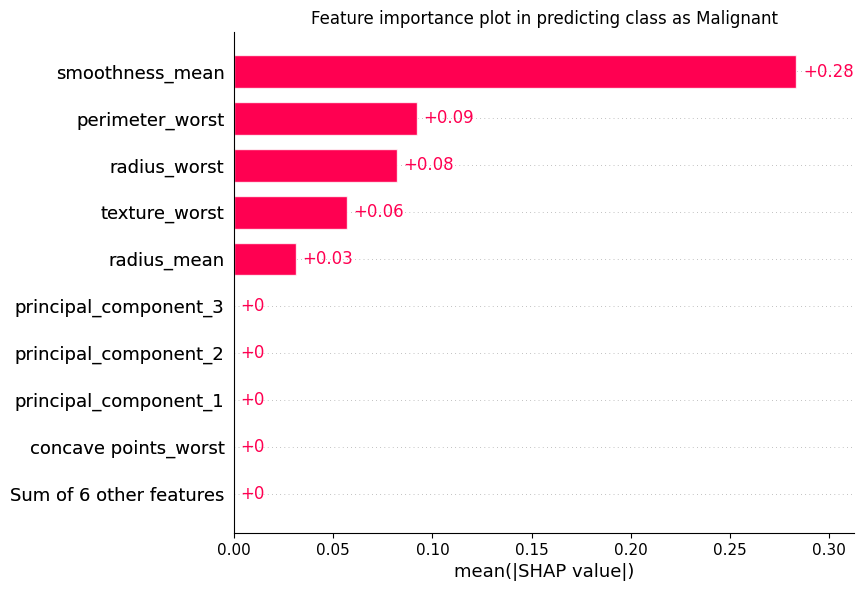

In [ ]:
# feature importance plot for features in  predicting class as Malignant

plt.title("Feature importance in predicting class as Malignant")
shap.plots.bar(shap_values=get_explanation(),
               show_data=False)

plt.show()


> **`smoothness_mean` postively contributes 28% on average, following `perimeter_worst`,`radius_worst`...**

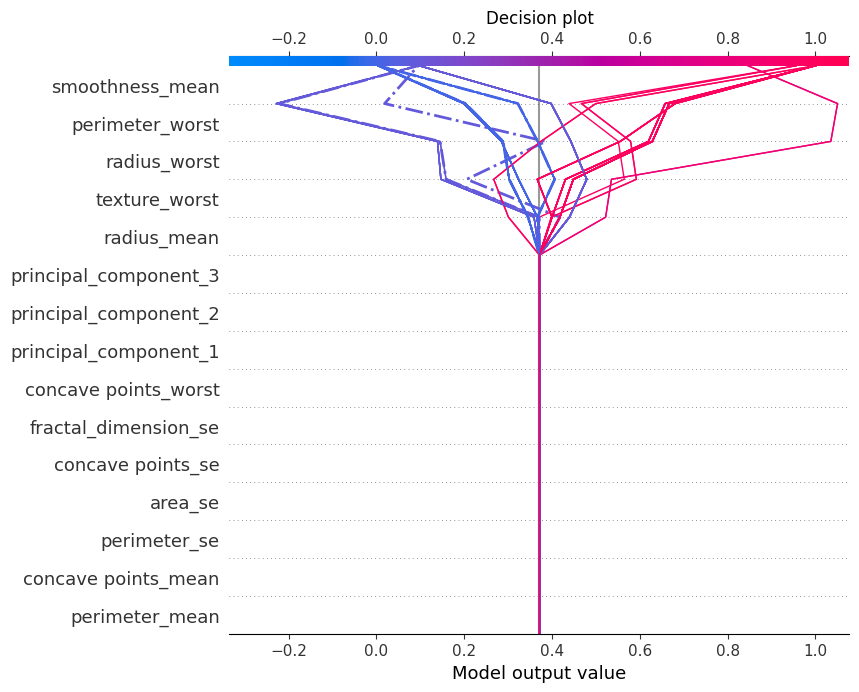

In [34]:
# creating a decision plot to see how model drive to its decision

decision_explanation = Explanation(values=shap_values,
                                   base_values=explainer.expected_value[1],
                                   data=x_test,
                                   feature_names=features)

misclassified = y_pred != y_test.to_numpy()

shap.plots.decision(shap_values=decision_explanation.values,
                     base_value=explainer.expected_value[1],
                     feature_names=features,
                     legend_location='lower right',
                     ignore_warnings=True,
                     highlight = misclassified,
                     show=False)
plt.title("Decision plot")
plt.show()

> **The dotted line representing misclassified instances. Many of the features ain't 't contributing much to the model's decision as also seen in the feature importance plot.**"""

Let's dive deeper into misclassified instances using stacked force plot to see how each feature contributed in wrongly classification.

In [30]:
# stacked force plot for misclassified instances

# getting misclassified indices

misclassifed_idxs = np.where(misclassified)
shap.plots.initjs()
# stacked force plot
shap.plots.force(base_value=explainer.expected_value[1],
                 shap_values=shap_values[misclassifed_idxs],
                 feature_names=features)

## **Performance Heatmap**

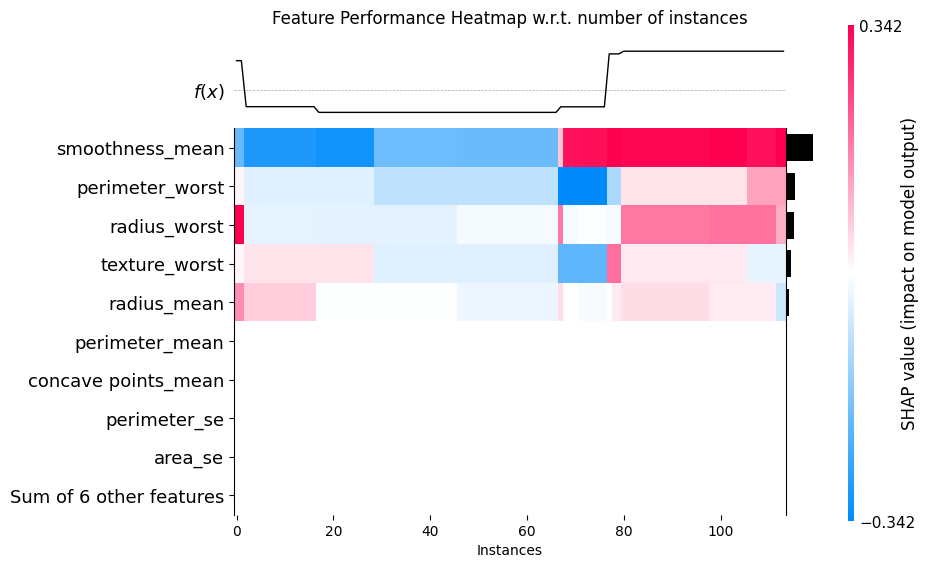

In [33]:
# heatmap to show performance by each feature and in what ratio it prediction the class
shap.plots.heatmap(shap_values=get_explanation(),
                   show=False)
plt.title('Feature Performance Heatmap w.r.t. number of instances')
plt.show()
